In [13]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [15]:
!ls /gdrive

'My Drive'


In [0]:
import os
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
from keras import applications, metrics, layers, models, regularizers, optimizers
from keras.applications.mobilenet import MobileNet
from keras.applications.nasnet import NASNetLarge
from keras.models import load_model
# from skimage.transform import resize
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [0]:
# nas = NASNetLarge(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
# # nas.summary()
# nas.layers.pop()
# nas.outputs = [nas.layers[-1].output]
# nas.layers[-1].outbound_nodes = []

In [0]:
nas.summary()

In [17]:
mobilenet = MobileNet(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
mobilenet.summary()
# print(len(inceptionv3.layers))
mobilenet.layers.pop()
mobilenet.outputs = [mobilenet.layers[-1].output]
mobilenet.layers[-1].outbound_nodes = []

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [0]:
import pickle
import time

In [0]:
# width, height, frame_per_segment = 299, 299, 25
# path_of_fps15videos = '/gdrive/My Drive/DA-20182/forest_dataset/video/train'
# n_class = os.listdir(path_of_fps15videos)
# class_mapping = {'abnormal': 0,'normal': 1}

# trasfer_values = []
# labels = []
# for single_class in n_class:
#   print(single_class)
#   single_data = []
#   class_path = os.path.join(path_of_fps15videos, single_class)
#   videos = os.listdir(class_path)
#   for video in videos:
#     print(video)
#     cap = cv2.VideoCapture(os.path.join(class_path, video))
#     ret = True
#     count = 0
# #     start = int(round(time.time() * 1000))
#     trains_image = []
#     while ret:
#         ret, frame = cap.read()
#         if not ret:
#           continue
#         try:
#           image = cv2.resize(frame, (width, height), interpolation = cv2.INTER_AREA)
#           trains_image.append(image)
#           count += 1
#           if count==frame_per_segment:
#             count = 0
#             transfer_temp = inceptionv3.predict(np.array(trains_image))
# #             print(np.array(transfer_temp).shape)
#             for transfer in transfer_temp:
#               trasfer_values.append(transfer)
#               labels.append(class_mapping[single_class])
#             del trains_image[:]
#         except Exception as e:
#             print(str(e))
# with open(b"/gdrive/My Drive/DA-20182/data/forest_v2.pkl","wb") as f:
#     pickle.dump({'data': trasfer_values, 'label': labels},f)
#     f.close()

In [0]:
# with open("/gdrive/My Drive/DA-20182/data/origin_data/forest_v2.pkl","rb") as f:
#   unpickler = pickle.Unpickler(f)
#   pkl = unpickler.load()
#   data = pkl['data']
#   label = pkl['label']
#   print(len(data), len(label))
#   print(len(data[10000]))

In [19]:
!sudo pip install git+https://github.com/okankop/vidaug

  Cloning https://github.com/okankop/vidaug to /tmp/pip-req-build-pujxokv_
  Running command git clone -q https://github.com/okankop/vidaug /tmp/pip-req-build-pujxokv_
  Stored in directory: /tmp/pip-ephem-wheel-cache-3rl8m5t4/wheels/3f/87/a3/14ed7eb5a878e2e239961990c700a400836e369fc109ecad86
Successfully built vidaug


In [0]:
from vidaug import augmentors as va
%matplotlib inline
from matplotlib import pyplot as plt

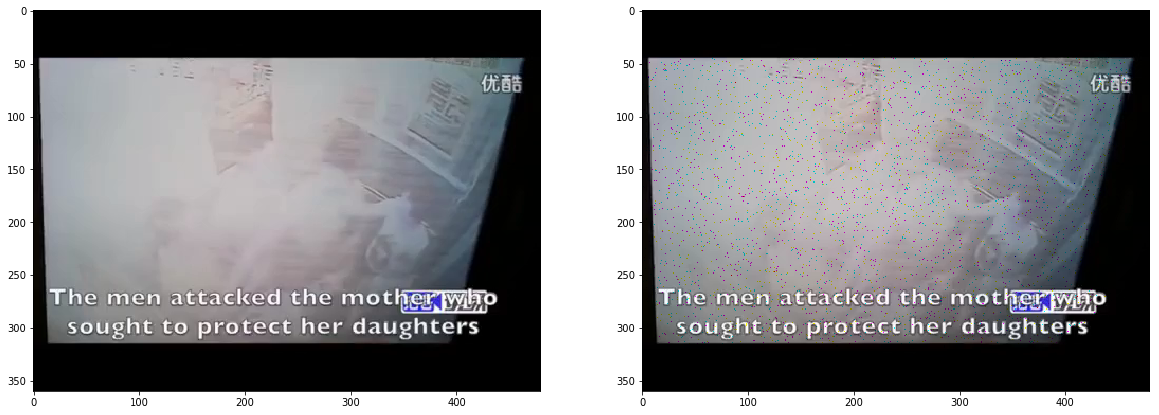

In [0]:
video_path = '/gdrive/My Drive/hackathon/Video-cut/train_videos/sam_so/19a.mp4'
cap = cv2.VideoCapture(video_path)
_, frame = cap.read()
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(frame)
plt.subplot(122)
plt.imshow(va.Pepper()([frame])[0])

In [21]:
!pip install --upgrade scipy

Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.3.0)


In [27]:
aug_factor = 2
width, height, batch_size = 224, 224, 64
video_path = '/gdrive/My Drive/hackathon/Video-cut/train_videos/'
n_class = os.listdir(video_path)
class_mapping = {'sam_so': 0,'ko_sam_so': 1}

def write_feature(thread):
  trasfer_values = []
  labels = []
  for single_class in n_class:
    print('Thread'+str(thread)+' '+single_class)
    single_data = []
    class_path = os.path.join(video_path, single_class)
    videos = os.listdir(class_path)
    for video in videos: 
      print('Thread'+str(thread)+' '+video)
      cap = cv2.VideoCapture(os.path.join(class_path, video))
      ret = True
      count = 0
  #     start = int(round(time.time() * 1000))
      trains_image = []
      while ret:
        ret, frame = cap.read()
        if not ret:
          continue
        try:
          image = cv2.resize(frame, (width, height), interpolation = cv2.INTER_AREA)
          trains_image.append(image)
          count += 1
          if count==batch_size:
            count = 0
            # begin augmentation ##
            sometimes = lambda aug: va.Sometimes(0.5, aug) # Used to apply augmentor with 50% probability
            seq = np.random.choice([
                # va.RandomRotate(degrees=10), # randomly rotates the video with a degree randomly choosen from [-10, 10]  
#                 sometimes(va.HorizontalFlip()), # horizontally flip the video with 50% probability
#                 va.PiecewiseAffineTransform(0.1,0.1,0.1),
#                 va.GaussianBlur(sigma=0.05),
#                 va.InvertColor(),
                va.HorizontalFlip(),
#                 va.Multiply(np.random.uniform(0.8,1.2)),
#                 va.Downsample(np.random.uniform(0.8,1)),
#                 va.Upsample(np.random.uniform(1,1.2)),
#                 va.Salt(),
#                 va.Pepper()
            ])
            # print ('bug1, ', np.array(trains_image).shape)
            trains_image = seq(trains_image)
            # print ('bug2, ', np.array(trains_image).shape)
            # end augmentation ##
            transfer_temp = mobilenet.predict(np.array(trains_image).astype(np.float64))
  #             print(np.array(transfer_temp).shape)
            for transfer in transfer_temp:
              trasfer_values.append(transfer)
              labels.append(class_mapping[single_class])
            del trains_image[:]
        except Exception as e:
          print(str(e))
  with open(b"/gdrive/My Drive/hackathon/transfer_value/sex_mobilenet_ver1.pkl","wb") as f:
    pickle.dump({'data': trasfer_values, 'label': labels},f)
    f.close()
    
# from multiprocessing import Pool
# p = Pool(4)
# p.map(write_feature, [1,2,3,4])
write_feature(1)
write_feature(2)

Thread1 ko_sam_so
Thread1 videoplayback (13) (online-video-cutter.com)(2).mp4
Thread1 videoplayback (11) (online-video-cutter.com).mp4
Thread1 videoplayback (16) (online-video-cutter.com)(1).mp4
Thread1 videoplayback (16) (online-video-cutter.com).mp4
Thread1 videoplayback (12) (online-video-cutter.com).mp4
Thread1 videoplayback (13) (online-video-cutter.com).mp4
Thread1 19b.mp4
Thread1 19d.mp4
Thread1 20b.mp4
Thread1 20d.mp4
Thread1 21b.mp4
Thread1 21c.mp4
Thread1 22b.mp4
Thread1 20e.mp4
Thread1 23b.mp4
Thread1 24b.mp4
Thread1 25b.mp4
Thread1 23c.mp4
Thread1 25c.mp4
Thread1 Sàm sỡ trong thang máy- Đối tượng đã trình diện công an (online-video-cutter.com) (1).mp4
Thread1 videoplayback (1) (online-video-cutter.com) (1).mp4
Thread1 videoplayback (1) (online-video-cutter.com)_b.mp4
Thread1 videoplayback (2) (online-video-cutter.com) (1).mp4
Thread1 videoplayback_hai1 (online-video-cutter.com) (1).mp4
Thread1 Ông Nguyễn Hữu Linh khai tên giả vì lo mất danh dự (onl

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
with open("/gdrive/My Drive/hackathon/transfer_value/sex_nas.pkl","rb") as f:
  unpickler = pickle.Unpickler(f)
  pkl = unpickler.load()
  data = pkl['data']
  label = pkl['label']
  print(len(data), len(label))
  print(len(data[10000]))